# Temas Tratados en el Trabajo Práctico 5

* Comportamiento y operaciones bajo incertidumbre.

* Teorema de Bayes.

* Representación de la información incierta en Redes Bayesianas.

* Inferencia por enumeración.

* Redes de Markov y matrices de transición.

* Tiempo esperado y probabilidad de absorción.


# Ejercicios Teóricos

## ¿Cuáles son los tres axiomas de Kolmogorov?

Los axiomas de kolmogorov definen lo que se considera un "evento de probabilidad" y cómo se deben calcular sus valores, ellos son:

1) Axioma de no negatividad: La probabilidad de cualquier evento A es un número real no negativo. Esto se expresa como:

$ P(A) \geq 0 $

2) Axioma de la probabilidad del espacio muestral: La probabilidad del espacio muestral (S), que representa todos los resultados posibles de un experimento, es igual a 1. Esto se expresa como:

$ P(S) = 1$

3) Axioma de la adición (o de la suma finita o numerable): Si tenemos una secuencia de eventos mutuamente excluyentes (disjuntos), la probabilidad de que ocurra al menos uno de ellos es la suma de sus probabilidades individuales.

Si $A_1, A_2, A_3, ...$ es una secuencia de eventos mutuamente excluyentes (disjuntos), entonces:
$$P(\bigcup_{i=1}^{\infty} A_i) = \sum_{i=1}^{\infty} P(A_i)$$

Este axioma es crucial para eventos que no pueden ocurrir simultáneamente.


## Una fábrica de clavos dispone de 2 máquinas que elaboran el 30% y 70% de los clavos que producen respectivamente. El porcentaje de clavos defectuosos de cada máquina es del 2% y 3%, respectivamente. Si se selecciona al azar un clavo de la producción y este fue defectuoso, ¿cuál es la probabilidad de que haya sido fabricado por la máquina?

Definiendo:
$$
\begin{align*}

M & \text{:  clavo fabricado por } M_{1} \\

\neg M & \text{:  clavo fabricado por }M_{2} \\ 

D & \text{: clavo defectuoso}

\end{align*}
$$

$$
\begin{align*}
P(M) & = 30\%  \\
P(\neg M) & = 70\% \\
P(D|M) & = 2\% \\
P(D|\neg M) & = 2\%
\end{align*}
$$

Por la Ley de Probabilidad total, tenemos:

$$
\begin{align*}

P(D) & = P(D|M) \cdot P(M)  +  P(D|\neg M) \cdot P(\neg M) \\

& = 0.3 \cdot 0.02  +  0.7 \cdot 0.03 \\

& = 0.027 = 2,7\% 

\end{align*}
$$

Usando teorema de Bayes:

$$
\begin{align*}
P(M|D)  = \frac{P(M)}{P(D)} \cdot P(D|M) & = \frac{0.3}{0.027} \cdot 0.02 \\
& = \frac{2}{9} \approx 22.22\% \\

\\ \\ 

 P(\neg M|D)  = \frac{P(\neg M)}{P(D)} \cdot P(D|\neg M) & = \frac{0.7}{0.027} \cdot 0.03 \\
& = \frac{7}{9} \approx 77.77\% \\
\end{align*}
$$

Lo que nos deja finalmente con:

$$
\begin{align*}
P(M|D)  & = 22,22\% \\
P(\neg M|D)  & = 77,77\%
\end{align*}
$$


``` python
# =========================================================
# Ejercicio de Probabilidad y Regla de Bayes: Fábrica de Clavos
# =========================================================

# 1. Definición de las probabilidades a priori (producción de cada máquina)
P_M1 = 0.30  # Probabilidad de que un clavo sea de la Máquina 1 (30%)
P_M2 = 0.70  # Probabilidad de que un clavo sea de la Máquina 2 (70%)

# 2. Definición de las probabilidades condicionales (defectuoso dado la máquina)
P_D_dado_M1 = 0.02  # Probabilidad de ser defectuoso dado que es de M1 (2%)
P_D_dado_M2 = 0.03  # Probabilidad de ser defectuoso dado que es de M2 (3%)

# 3. Aplicación de la Ley de la Probabilidad Total
# Calculamos P(D): Probabilidad total de que un clavo sea defectuoso
# P(D) = P(D|M1) * P(M1) + P(D|M2) * P(M2)
P_D = (P_D_dado_M1 * P_M1) + (P_D_dado_M2 * P_M2)

# 4. Aplicación de la Regla de Bayes
# Buscamos P(M1|D): Probabilidad de que sea de la Máquina 1, dado que es defectuoso.
# P(M1|D) = [P(D|M1) * P(M1)] / P(D)
numerador_bayes = P_D_dado_M1 * P_M1
P_M1_dado_D = numerador_bayes / P_D

# 5. Impresión de Resultados
print(f"--- Probabilidades Iniciales ---")
print(f"Probabilidad de ser defectuoso de M1 (P(D|M1)): {P_D_dado_M1:.2f}")
print(f"Probabilidad de ser defectuoso de M2 (P(D|M2)): {P_D_dado_M2:.2f}")
print(f"Producción de M1 (P(M1)): {P_M1:.2f}")
print(f"Producción de M2 (P(M2)): {P_M2:.2f}")
print(f"--------------------------------")

print(f"\n--- Paso Intermedio: Ley de Probabilidad Total ---")
print(f"Probabilidad Total de un clavo defectuoso (P(D)): {P_D:.4f}")

print(f"\n--- Resultado Final: Regla de Bayes ---")
print(f"Probabilidad de que el clavo defectuoso sea de la Máquina 1 (P(M1|D)): {P_M1_dado_D:.4f}")
print(f"O en porcentaje: {P_M1_dado_D * 100:.2f}%")
```

## La probabilidad de que un motor que sale de una fábrica con una *avería eléctrica* es de $10^{-3}$, y la probabilidad de que salga con una *avería mecánica* es de $10^{-5}$. Si existe un tipo de avería no se producen averías del otro tipo.
<br><br>Si el motor presenta *temperatura elevada* se enciende un *piloto luminoso* el 95% de las veces, cuando la *temperatura es reducida* el *piloto luminoso* se enciende el 99% de las veces, y a veces cuando la *temperatura se encuentra en un rango normal* el *piloto luminoso* se enciende erróneamente en un caso por millón.
<br><br>Cuando *no hay averías*, la *temperatura se eleva* en el 17% de los casos y es *reducida* el 5% de las veces. Si hay una *avería eléctrica*, la *temperatura se eleva* en el 90% de los casos y es *reducida* en el 1% de los casos. Finalmente cuando la *avería es mecánica*, la *temperatura está elevada* el 10% de los casos y *reducida* el 40% de las veces.
<br><br>Construya una Red Bayesiana y utilice inferencia por enumeración para calcular:

Se realiza el siguiente diagrama:



### La probabilidad de que el motor tenga una avería mecánica si se enciende el piloto.


### La probabilidad de que el motor tenga una avería mecánica si se enciende el piloto y la temperatura es elevada.

``` python
# --- Definición de Probabilidades ---
# Probabilidades a priori de la avería
p_averia = {
    'electrica': 1e-3,
    'mecanica': 1e-5,
    'no_averia': 1 - 1e-3 - 1e-5
}

# Probabilidades condicionales de la temperatura
p_temp_dado_averia = {
    'no_averia': {'elevada': 0.17, 'reducida': 0.05, 'normal': 0.78},
    'electrica': {'elevada': 0.90, 'reducida': 0.01, 'normal': 0.09},
    'mecanica': {'elevada': 0.10, 'reducida': 0.40, 'normal': 0.50}
}

# Probabilidades condicionales del piloto
p_piloto_dado_temp = {
    'elevada': {'encendido': 0.95, 'apagado': 0.05},
    'reducida': {'encendido': 0.99, 'apagado': 0.01},
    'normal': {'encendido': 1e-6, 'apagado': 1 - 1e-6}
}

def calcular_prob_conjunta(averia, temp, piloto):
    """
    Calcula la probabilidad conjunta P(Averia, Temperatura, Piloto)
    usando la regla de la cadena: P(P|T) * P(T|A) * P(A).
    """
    return (p_piloto_dado_temp[temp][piloto] *
            p_temp_dado_averia[averia][temp] *
            p_averia[averia])

# Problema 3.1: P(Avería=mecanica | Piloto=encendido) ---
print("## Resultado 3.1: Inferencia por Enumeración")
print("### P(Avería Mecánica | Piloto Encendido)")

# Numerador: P(Avería=mecanica, Piloto=encendido)
# Se suman las probabilidades conjuntas de todas las temperaturas para la avería mecánica
num_3_1 = sum(calcular_prob_conjunta('mecanica', temp, 'encendido')
            for temp in ['elevada', 'reducida', 'normal'])

# Denominador: P(Piloto=encendido) (Probabilidad total)
# Se suman las probabilidades conjuntas de todas las averías y temperaturas
den_3_1 = sum(calcular_prob_conjunta(averia, temp, 'encendido')
            for averia in ['electrica', 'mecanica', 'no_averia']
            for temp in ['elevada', 'reducida', 'normal'])

prob_3_1 = num_3_1 / den_3_1
print(f"Probabilidad Calculada: **{prob_3_1:.10f}**")
print(f"---------------------------------------------------------------------------------------------------")

# Problema 3.2: P(Avería=mecanica | Piloto=encendido, Temperatura=elevada) ---
print("\n## Resultado 3.2: Inferencia por Enumeración")
print("### P(Avería Mecánica | Piloto Encendido, Temperatura Elevada)")

# Numerador: P(Avería=mecanica, Temperatura=elevada, Piloto=encendido)
# No es necesario sumar porque la temperatura ya es un evento observado
num_3_2 = calcular_prob_conjunta('mecanica', 'elevada', 'encendido')

# Denominador: P(Temperatura=elevada, Piloto=encendido)
# Se suman las probabilidades conjuntas para cada tipo de avería
den_3_2 = sum(calcular_prob_conjunta(averia, 'elevada', 'encendido')
            for averia in ['electrica', 'mecanica', 'no_averia'])

prob_3_2 = num_3_2 / den_3_2
print(f"Probabilidad Calculada: **{prob_3_2:.10f}**")
print(f"---------------------------------------------------------------------------------------------------")
```

## Cada día se procesa un producto en secuencia en dos máquinas, M1 y M2. Una inspección se realiza después de que una unidad del producto se completa en cualquiera de las máquinas. 
<br><br>Hay un 5% de probabilidades de que una unidad sea desechada antes de inspeccionarla. Después de la inspección, hay un 3% de probabilidades de que la unidad sea desechada y un 7% de probabilidades de ser devuelta a la misma máquina para trabajarla
de nuevo. Si una unidad pasa la inspección en ambas máquinas es
buena.

### Dibuje la cadena de Markov que representa este problema y describa para cada estado si es transitorio, recurrente, o absorbente.

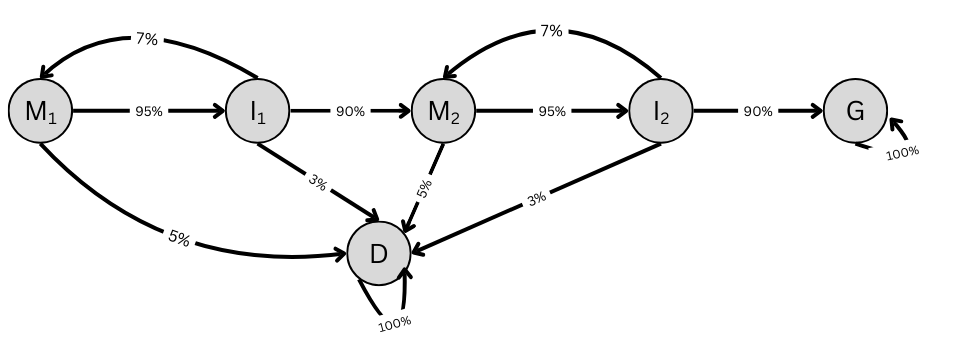

### Arme la matriz de transición

$$
T = \qquad
\begin{matrix}
 & \begin{matrix} M_1 \ & I_1 \ & M_2 \ & I_2 \ & D \ & \ \ G \end{matrix} \\
 \begin{matrix} M_1 \\ I_1 \\ M_2 \\ I_2 \\ D \\ G \end{matrix} &
\begin{bmatrix}
0 & .95 & 0 & 0 & 0.05 & 0 \\
0.07 & 0 & 0.9 & 0 & 0.03 & 0 \\
0 & 0 & 0 & 0.95 & 0.05 & 0 \\
0 & 0 & 0.07 & 0 & 0.03 & 0.9 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}

\end{matrix}
$$

Y la matriz de estados no absorventes y la matriz de estados absorventes son:

$$

N = \begin{bmatrix} 0 & 0.95 & 0 & 0 \\ 0.07 & 0 & 0.9 & 0 \\ 0 & 0 & 0 & 0.95 \\ 0 & 0 & 0.07 & 0 \end{bmatrix}

\qquad

A = \begin{bmatrix} 0.5 & 0 \\ 0.03 & 0 \\ 0.5 & 0 \\ 0.03 & 0.90 \end{bmatrix}

$$


### Calcule la probabilidad de que una pieza que inicia el proceso en la máquina M1 sea desechada.

Debido a que es matricialmente, se debe hacer el cálculo para todos los estados transitorios, considerando todos los estados absorventes. Planteamos:

$$
\begin{align*}
(I-N)^{-1}A &=  \left(\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix} - \begin{bmatrix}
0 & 0.95 & 0 & 0 \\ 0.07 & 0 & 0.9 & 0 \\ 0 & 0 & 0 & 0.95 \\ 0 & 0 & 0.07 & 0
\end{bmatrix}\right)^{-1} \begin{bmatrix}
0.05  & 0 \\ 0.03 & 0 \\ 0.05 & 0 \\ 0.03 & 0.9
\end{bmatrix}
 \\
 \\
 & = \begin{matrix}  & \begin{matrix}
\text{Desechados} & \text{Good}
\end{matrix} \\
\begin{matrix}
M_{1} \\
I_{1} \\
M_{2} \\
I_{2}
\end{matrix} &  \begin{bmatrix}
0.161112 & 0.838887 \\
0.116960 & 0.883039 \\
0.084092 & 0.915907 \\
0.035886 & 0.964113
\end{bmatrix} \\

\end{matrix}
\end{align*}
$$

Cómo leer esa matriz

$$
\begin{align*}
\text{Filas} & \to \text{estado  transitorio donde comienza la pieza (M1, I1, M2, I2).} \\
\text{Columnas} & \to \text{estados  absorbentes (Desecho o Good).} \\
\text{Valor numérico} & \to \text{probabilidad de que el proceso termine en ese estado absorbente si arranca en ese transitorio.}
\end{align*}
$$

Interpretación directa de tus números

* Desde M1:

$$
\begin{align*}
\begin{matrix} 
P(D∣M1)=0.161112 \\
P(G∣M1)=0.838887
\end{matrix}
\to \text{Si una pieza entra a la máquina 1, tiene ~16\% de chance de acabar desechada y ~84\% de salir buena.}
\end{align*}
$$

* Desde I1:

$$
\begin{align*}
\begin{matrix} 
P(D∣I1)=0.116960 \\
P(G∣I1)=0.883039
\end{matrix}
\to \text{Si la pieza está justo en inspección 1, tiene 11.7\% de terminar en D y 88.3\% en G.}
\end{align*}
$$

* Desde M2:

$$
\begin{align*}
\begin{matrix} 
P(D∣M2)=0.084092 \\
P(G∣M2)=0.915907
\end{matrix}
\to \text{Desde la máquina 2, el proceso es más seguro: ~8\% de rechazo, ~92\% de éxito.}
\end{align*}
$$

* Desde I2:

$$
\begin{align*}
\begin{matrix} 
P(D∣I2)=0.035886 \\
P(G∣I2)=0.964113
\end{matrix}
\to \text{Desde la inspección 2, la probabilidad de acabar bien es altísima: ~96\% contra ~4\% de desecho.}
\end{align*}
$$

La probabilidad de que una pieza que inicia en el proceso de la máquina M1 sea desechada es de: $P(D|M_1)=16,1112\%$  

### Calcule la probabilidad de que una pieza de la máquina M2 sea terminada.

La probabilidad de que una pieza que inicia en el proceso de la máquina M1 sea terminada es de: $P(G|M_2)=91.5907\%$  


### Si los tiempos de procesamiento en las máquinas M1 y M2 son respectivamente de 20 y 30 minutos y los tiempos de inspección son respectivamente de 5 y 7 minutos, ¿cuánto tiempo tarda en ser procesada una pieza que inicia en la máquina M1?

El tiempo __mínimo__ de procesamiento sería: $t_{M_1} + t_{I_1} + t_{M_2} + t_{I_2} = 62 \text{ [min]}$. Pero en cadenas de Markov con tiempos asociados, el tiempo esperado se calcula con:

$$ Tiempo esperado=(tiempo en cada estado transitorio)\times(numero esperado de visitas a ese estado) $$

Ese “número esperado de visitas” no es un invento: lo da la matriz fundamental:

$$ Q = (I-N)^{-1} $$

Se hace un vector de tiempos $\vec{t} = \begin{bmatrix} 20 & 5 & 30 & 7 \end{bmatrix}^T$ de manera ordenada $(M_1, I_1, M_2, I_2)$. Luego, se multiplica $Q \cdot t$:

$$
\begin{align*}

Q \cdot \vec{t} & = \left(\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix} - \begin{bmatrix}
0 & 0.95 & 0 & 0 \\ 0.07 & 0 & 0.9 & 0 \\ 0 & 0 & 0 & 0.95 \\ 0 & 0 & 0.07 & 0
\end{bmatrix}\right)^{-1} \begin{bmatrix} 20 \\ 5 \\ 30 \\ 7 \end{bmatrix}
\\
\\
Q \cdot \vec{t} & = 62,47244 \text{ [min]} = 62 \text{ [min] y } 28 \text{ [seg]}
\end{align*}
$$

El tiempo de procesamiento de una pieza que inicia en la máquina M1 será de aproximadamente 62 minutos, que en este caso coincide con la suma de los tiempos individuales de cada proceso.

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)
